In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split

In [76]:
df = pd.read_csv(r"C:\Users\Yagnesh Narola\Documents\Coding Languages\Artificial Intelligence\Excel_and_CSV\earthquake_1995-2023.csv")

In [100]:
le = LabelEncoder()
model = LinearRegression()
rd = Ridge()
ls = Lasso()
scaler = StandardScaler()

In [78]:
df.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        551
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       6
continent    716
country      349
dtype: int64

In [79]:
df

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"M 7.1 - 85 km S of Tungor, Russia",7.1,27-05-1995 13:03,0,9,NaN,0,776,us,0,0.000000,0.0,mwb,11.000,52.6290,142.8270,"Tungor, Russia",Asia,Russia
996,"M 7.7 - 249 km E of Vao, New Caledonia",7.7,16-05-1995 20:12,0,4,NaN,0,912,us,0,0.000000,0.0,mw,20.200,-23.0080,169.9000,"Vao, New Caledonia",NaN,NaN
997,"M 6.9 - 27 km NNW of Maubara, Timor Leste",6.9,14-05-1995 11:33,0,6,NaN,0,732,us,0,0.000000,0.0,mw,11.200,-8.3780,125.1270,"Maubara, Timor Leste",NaN,Indonesia
998,"M 6.6 - 10 km W of Aianí, Greece",6.6,13-05-1995 08:47,0,9,NaN,0,670,us,0,0.000000,0.0,mw,14.000,40.1490,21.6950,"Aianí, Greece",Europe,Greece


In [80]:
df.columns

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country'],
      dtype='object')

In [81]:
df2 = df.copy()

In [82]:
df2 = df2.drop(columns = ['title','alert','tsunami','gap','location','date_time','country','continent',"cdi", "mmi", "sig"])

In [83]:
df2

,magnitude,net,nst,dmin,magType,depth,latitude,longitude
0,6.5,us,114,7.177000,mww,192.955,-13.8814,167.1580
1,6.5,us,92,0.679000,mww,69.727,12.8140,-88.1265
2,6.6,us,70,1.634000,mww,171.371,-38.1911,-70.3731
3,7.2,us,173,0.907000,mww,32.571,54.3844,-160.6990
4,7.3,at,79,0.879451,Mi,21.000,54.4900,-160.7960
...,...,...,...,...,...,...,...,...
995,7.1,us,0,0.000000,mwb,11.000,52.6290,142.8270
996,7.7,us,0,0.000000,mw,20.200,-23.0080,169.9000
997,6.9,us,0,0.000000,mw,11.200,-8.3780,125.1270
998,6.6,us,0,0.000000,mw,14.000,40.1490,21.6950


In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1000 non-null   float64
 1   net        1000 non-null   object 
 2   nst        1000 non-null   int64  
 3   dmin       1000 non-null   float64
 4   magType    1000 non-null   object 
 5   depth      1000 non-null   float64
 6   latitude   1000 non-null   float64
 7   longitude  1000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 62.6+ KB


In [85]:
df2.isnull().sum()

magnitude    0
net          0
nst          0
dmin         0
magType      0
depth        0
latitude     0
longitude    0
dtype: int64

In [86]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1000 non-null   float64
 1   net        1000 non-null   object 
 2   nst        1000 non-null   int64  
 3   dmin       1000 non-null   float64
 4   magType    1000 non-null   object 
 5   depth      1000 non-null   float64
 6   latitude   1000 non-null   float64
 7   longitude  1000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 62.6+ KB


In [87]:
df2['net'] = le.fit_transform(df2['net'])
df2['magType'] = le.fit_transform(df2['magType'])

In [88]:
df2

,magnitude,net,nst,dmin,magType,depth,latitude,longitude
0,6.5,9,114,7.177000,8,192.955,-13.8814,167.1580
1,6.5,9,92,0.679000,8,69.727,12.8140,-88.1265
2,6.6,9,70,1.634000,8,171.371,-38.1911,-70.3731
3,7.2,9,173,0.907000,8,32.571,54.3844,-160.6990
4,7.3,1,79,0.879451,0,21.000,54.4900,-160.7960
...,...,...,...,...,...,...,...,...
995,7.1,9,0,0.000000,6,11.000,52.6290,142.8270
996,7.7,9,0,0.000000,5,20.200,-23.0080,169.9000
997,6.9,9,0,0.000000,5,11.200,-8.3780,125.1270
998,6.6,9,0,0.000000,5,14.000,40.1490,21.6950


In [90]:
x = df2.drop(columns = 'magnitude')
y = df2['magnitude']

In [96]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 42,test_size = 0.2)

In [104]:
scaler.fit(xtrain)
xtrainscaled = scaler.transform(xtrain)
xtestscaled = scaler.transform(xtest)
model.fit(xtrainscaled,ytrain)
model.score(xtestscaled,ytest)

0.03520970612073404

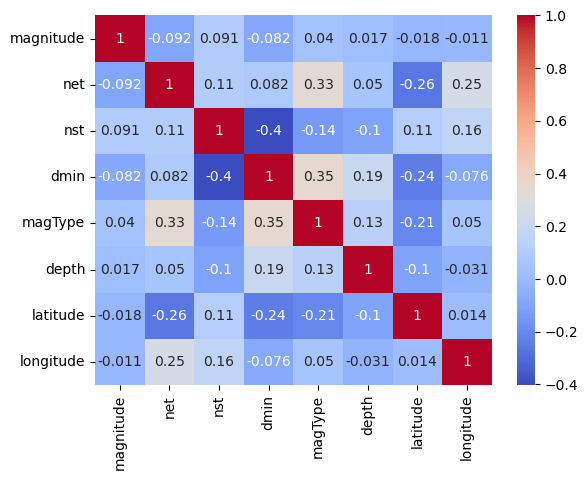

In [106]:
sns.heatmap(df2.corr(), annot=True, cmap="coolwarm")
mp.show()